# Logistic Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [2]:
bank=pd.read_csv('/content/bank-additional-full.csv')
bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
#Shape of the data set
bank.shape

(41188, 21)

In [4]:
# Removing NA values in data set
bank = bank.dropna()
bank.shape

(41188, 21)

In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
dataset=pd.get_dummies(bank,columns=['job','marital','education','contact','poutcome'])
dataset

,age,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,...,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,no,no,no,may,mon,261,1,999,0,...,0,0,0,0,0,0,1,0,1,0
1,57,unknown,no,no,may,mon,149,1,999,0,...,1,0,0,0,0,0,1,0,1,0
2,37,no,yes,no,may,mon,226,1,999,0,...,1,0,0,0,0,0,1,0,1,0
3,40,no,no,no,may,mon,151,1,999,0,...,0,0,0,0,0,0,1,0,1,0
4,56,no,no,yes,may,mon,307,1,999,0,...,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,no,yes,no,nov,fri,334,1,999,0,...,0,0,1,0,0,1,0,0,1,0
41184,46,no,no,no,nov,fri,383,1,999,0,...,0,0,1,0,0,1,0,0,1,0
41185,56,no,yes,no,nov,fri,189,2,999,0,...,0,0,0,1,0,1,0,0,1,0
41186,44,no,no,no,nov,fri,442,1,999,0,...,0,0,1,0,0,1,0,0,1,0


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   default                        41188 non-null  object 
 2   housing                        41188 non-null  object 
 3   loan                           41188 non-null  object 
 4   month                          41188 non-null  object 
 5   day_of_week                    41188 non-null  object 
 6   duration                       41188 non-null  int64  
 7   campaign                       41188 non-null  int64  
 8   pdays                          41188 non-null  int64  
 9   previous                       41188 non-null  int64  
 10  emp.var.rate                   41188 non-null  float64
 11  cons.price.idx                 41188 non-null  float64
 12  cons.conf.idx                  41188 non-null 

In [8]:
# Custom Binary Encoding of Binary o/p variables 
dataset['default'] = np.where(dataset['default'].str.contains("yes"), 1, 0)
dataset['housing'] = np.where(dataset['housing'].str.contains("yes"), 1, 0)
dataset['loan'] = np.where(dataset['loan'].str.contains("yes"), 1, 0)
dataset['y'] = np.where(dataset['y'].str.contains("yes"), 1, 0)
dataset

,age,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,...,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,0,0,0,may,mon,261,1,999,0,...,0,0,0,0,0,0,1,0,1,0
1,57,0,0,0,may,mon,149,1,999,0,...,1,0,0,0,0,0,1,0,1,0
2,37,0,1,0,may,mon,226,1,999,0,...,1,0,0,0,0,0,1,0,1,0
3,40,0,0,0,may,mon,151,1,999,0,...,0,0,0,0,0,0,1,0,1,0
4,56,0,0,1,may,mon,307,1,999,0,...,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,0,1,0,nov,fri,334,1,999,0,...,0,0,1,0,0,1,0,0,1,0
41184,46,0,0,0,nov,fri,383,1,999,0,...,0,0,1,0,0,1,0,0,1,0
41185,56,0,1,0,nov,fri,189,2,999,0,...,0,0,0,1,0,1,0,0,1,0
41186,44,0,0,0,nov,fri,442,1,999,0,...,0,0,1,0,0,1,0,0,1,0


In [9]:
dataset['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [10]:
order={'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}}

In [11]:
dataset=dataset.replace(order)
dataset

,age,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,...,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,0,0,0,5,mon,261,1,999,0,...,0,0,0,0,0,0,1,0,1,0
1,57,0,0,0,5,mon,149,1,999,0,...,1,0,0,0,0,0,1,0,1,0
2,37,0,1,0,5,mon,226,1,999,0,...,1,0,0,0,0,0,1,0,1,0
3,40,0,0,0,5,mon,151,1,999,0,...,0,0,0,0,0,0,1,0,1,0
4,56,0,0,1,5,mon,307,1,999,0,...,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,0,1,0,11,fri,334,1,999,0,...,0,0,1,0,0,1,0,0,1,0
41184,46,0,0,0,11,fri,383,1,999,0,...,0,0,1,0,0,1,0,0,1,0
41185,56,0,1,0,11,fri,189,2,999,0,...,0,0,0,1,0,1,0,0,1,0
41186,44,0,0,0,11,fri,442,1,999,0,...,0,0,1,0,0,1,0,0,1,0


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   default                        41188 non-null  int64  
 2   housing                        41188 non-null  int64  
 3   loan                           41188 non-null  int64  
 4   month                          41188 non-null  int64  
 5   day_of_week                    41188 non-null  object 
 6   duration                       41188 non-null  int64  
 7   campaign                       41188 non-null  int64  
 8   pdays                          41188 non-null  int64  
 9   previous                       41188 non-null  int64  
 10  emp.var.rate                   41188 non-null  float64
 11  cons.price.idx                 41188 non-null  float64
 12  cons.conf.idx                  41188 non-null 

In [13]:
# dropping the case number columns as it is not required
dataset.drop(['day_of_week','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'],inplace=True,axis = 1)

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   age                            41188 non-null  int64
 1   default                        41188 non-null  int64
 2   housing                        41188 non-null  int64
 3   loan                           41188 non-null  int64
 4   month                          41188 non-null  int64
 5   duration                       41188 non-null  int64
 6   campaign                       41188 non-null  int64
 7   pdays                          41188 non-null  int64
 8   previous                       41188 non-null  int64
 9   y                              41188 non-null  int64
 10  job_admin.                     41188 non-null  uint8
 11  job_blue-collar                41188 non-null  uint8
 12  job_entrepreneur               41188 non-null  uint8
 13  job_housemaid   

In [14]:
# Dividing our data into input and output variables
x=pd.concat([dataset.iloc[:,0:11],dataset.iloc[:,12:]],axis=1)
y=dataset.iloc[:,11]

In [15]:
#Logistic regression and fit the model
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
y_pred=classifier.predict(x)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [18]:
y_pred_df=pd.DataFrame({'actual_y':y,'y_pred_prob':y_pred})
y_pred_df

,actual_y,y_pred_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
41183,0,0
41184,1,0
41185,0,0
41186,0,0


In [19]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y,y_pred)
print (confusion_matrix)

[[30027  1907]
 [ 1697  7557]]


In [20]:
(39107+1282)/(39107+815+4007+1282)

0.8933445400455642

In [21]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94     31934
           1       0.80      0.82      0.81      9254

    accuracy                           0.91     41188
   macro avg       0.87      0.88      0.88     41188
weighted avg       0.91      0.91      0.91     41188



ROC Curve

In [23]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [24]:
classifier.predict_proba(x)[:,1] 

array([0.35278332, 0.00203445, 0.00653759, ..., 0.0004931 , 0.00102783,
       0.01093503])

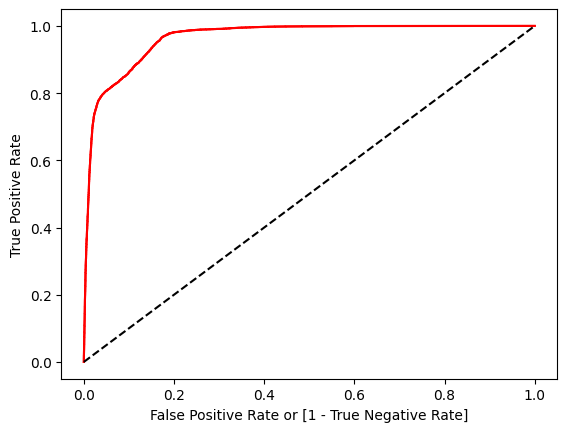

auc accuracy: 0.8784514619648107


In [25]:
fpr,tpr,thresholds=roc_curve(y,classifier.predict_proba(x)[:,1])
plt.plot(fpr,tpr,color='red')
auc=roc_auc_score(y,y_pred)

plt.plot(fpr,tpr,color='red',label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('auc accuracy:',auc)